In [1]:
import matplotlib.pyplot as plt
import numpy as np

import metagames.functional as mf

In [2]:
prisoners_dilemma = mf.main.GAMES['prisoners_dilemma']
self_play_experiment = mf.experiment.SelfPlayExperiment(prisoners_dilemma, self_aware=False)

In [3]:
agent_config = {
    'agent': 'sum',
    'num_parameters': 10,
    'initializer': 'scaled_normal',
    'loss': 'utility',
    'optimizer': 'grad',
    'learning_rate': 1e-1,
    'step_rate': 1,
    'num_players': 1,
}

[PlayerSpecification(agent=SumAgent(), initializer=<function scaled_normal_initializer at 0x7f4efd4d7ea0>, loss=<class 'metagames.functional.losses.UtilityLoss'>, optimizer=<class 'torch.optim.sgd.SGD'>, learning_rate=0.1, step_rate=1, name='SumAgent_0')]

In [4]:
data = mf.main.run_experiment(
    experiment='self_play_self_unaware',
    game=
)

In [5]:
step_idx = 0         # Global step
player_idx = 0       # Player index (in list of all players data['players']) 
player_step_idx = 0  # Player substep (may take multiple steps per global step)
round_idx = 0        # Substep gradient may be accumulated over multiple rounds with different opponents
data['steps'][step_idx]['player_updates'][player_idx][player_step_idx]['rounds'][round_idx]

{'opponent': PlayerSpecification(agent=SumAgent(), initializer=<function scaled_normal_initializer at 0x7f4efd4d7ea0>, loss=<class 'metagames.functional.losses.UtilityLoss'>, optimizer=<class 'torch.optim.sgd.SGD'>, learning_rate=0.1, step_rate=1, name='SumAgent_0'),
 'utility': array(-0.86382388),
 'action_logit': array(0.62843494),
 'opponent_action_logit': array(0.62843494)}

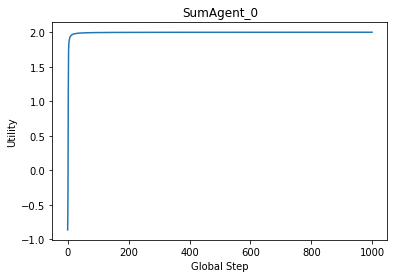

In [6]:
utilities = np.array([step_data['player_updates'][0][0]['mean_utility'] for step_data in data['steps']])
player, = data['players']
ax = plt.gca()
ax.plot(utilities)
ax.set_title(player.name)
ax.set_ylabel('Utility')
ax.set_xlabel('Global Step')
plt.show()